# Explore New Incident File

Contents

1. [A](#1) <br>
    1.1. [AA](#1.1) <br>
    1.2. [AAA](#1.2) <br>
    1.3. [AAAA](#1.3) <br>
2. [B](#2) <br>
    2.1. [BB](#2.1) <br>

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import os
import timeit
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
from datetime import date
import holidays
sns.set()
import warnings
warnings.filterwarnings("ignore")

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.sans-serif"] = "Verdana"
mpl.rcParams["lines.markersize"] = 20
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

## VDS Lat Long.csv

In [205]:
loc_df = pd.read_csv("data/VDS Lat Long.csv", header=0)

In [206]:
# Extract only Kwinana Northbound (inner) main road
loc_df = loc_df[(loc_df['Short Name'].str.contains("KWN-M")) &
      (loc_df['Latitude'] >= -32.091154) & 
      (loc_df['Latitude'] <= -31.96255087)]

In [207]:
# Check minimum and maximum latitude
loc_df.describe()

,Latitude,Longitude
count,50.000000,50.000000
mean,-32.034439,115.852021
std,0.038955,0.003635
min,-32.091154,115.846104
25%,-32.068862,115.849048
50%,-32.042161,115.851549
75%,-32.008197,115.855041
max,-31.966753,115.860188


In [209]:
loc_df.reset_index(drop=True)

,Short Name,Latitude,Longitude
0,0002KWN-MU,-31.969905,115.846725
1,0003KWN-MU,-31.988385,115.853238
2,0080KWN-MU,-31.966753,115.846104
3,0081KWN-MUL,-31.971349,115.847240
4,0081KWN-MUT,-31.971322,115.847235
5,0082KWN-MUL,-31.975453,115.847930
6,0082KWN-MUT,-31.975427,115.847925
7,0083KWN-MUL,-31.985870,115.852111
8,0083KWN-MUT,-31.985845,115.852099
9,0084KWN-MUL,-32.008217,115.855277


## Historic_Incidents_2016_-_2019__Points_.csv

In [2]:
inc_df=pd.read_csv("data/Historic_Incidents_2016_-_2019__Points_.csv", header=0)
inc_df.head()

,X,Y,OBJECTID,ID,WST_Start,WST_End,UTC_Start,UTC_END,Incident_Type,Description,Road,Operations_Centre,Location,Local_Rd_Name,TrafficCondition,Lat,Long,GlobalID
0,115.894297,-32.065714,1,62397,2017/01/01 16:59:00,2017/01/01 21:35:00,2017/01/01 08:58:59,2017/01/01 18:35:00,Road Crash,Roe Hwy southbound South Street Canningvale -...,Roe Hwy,Metro,All Lanes Open. No Known Congestion. Inciden...,NaN,All Lanes Open,-32.065714,115.894297,{EC2D031A-9C1F-430C-95F6-39F4E01DCF60}
1,115.786788,-33.991912,2,62401,2017/01/01 18:24:59,2017/01/12 11:12:00,2017/01/01 10:25:00,2017/01/12 08:12:00,Bushfire,Brockman Hwy both directions Brockman Rd East ...,Brockman Hwy,South West,All Lanes Open. No Known Congestion. Inciden...,NaN,All Lanes Open,-33.991912,115.786788,{7A443C5B-0C60-4A36-BBC9-0CA666A909F6}
2,115.711201,-31.674911,3,62408,2017/01/02 04:50:59,2017/01/02 05:48:00,2017/01/01 20:51:00,2017/01/02 02:48:00,Road Crash,Wanneroo Rd northbound near Hester Av Neerabu...,Wanneroo Rd,Metro,All Lanes Open. No Known Congestion. Inciden...,NaN,All Lanes Open,-31.674911,115.711201,{814E5E47-AF04-45FC-8372-0A47A2C82E60}
3,115.838520,-31.936552,4,62412,2017/01/02 07:30:00,2017/01/02 08:29:59,2017/01/01 23:29:59,2017/01/02 05:29:59,Road Crash,Mitchell Fwy southbound Vincent St Leederville...,Mitchell Fwy,Metro,All Lanes Open. No Known Congestion. Inciden...,NaN,All Lanes Open,-31.936552,115.838520,{E38AA494-D9A9-4901-9286-EE78AC27E5C4}
4,116.015323,-31.892157,5,62418,2017/01/02 08:16:59,2017/01/02 08:55:00,2017/01/02 00:17:00,2017/01/02 05:55:00,Road Crash,Great Eastern Hwy direction unknown Loton Av M...,Great Eastern Hwy,Metro,All Lanes Open. No Known Congestion. No Deto...,NaN,All Lanes Open,-31.892157,116.015323,{0E716842-4B22-4EE7-AD9F-C3D7D2E0C6CC}


In [3]:
df = inc_df[['OBJECTID','Lat', 'Long', 'WST_Start', 'WST_End',
             'Incident_Type', 'Description', 'Road', 'Location',
             'TrafficCondition']]; df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32477 entries, 0 to 32476
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          32477 non-null  int64  
 1   Lat               32477 non-null  float64
 2   Long              32477 non-null  float64
 3   WST_Start         32477 non-null  object 
 4   WST_End           32469 non-null  object 
 5   Incident_Type     32477 non-null  object 
 6   Description       32475 non-null  object 
 7   Road              29090 non-null  object 
 8   Location          32461 non-null  object 
 9   TrafficCondition  29090 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [4]:
df.WST_Start = pd.to_datetime(df.WST_Start)
df.WST_End = pd.to_datetime(df.WST_End)

In [5]:
# Extract only study period
df2 = df[(df.Road == 'Kwinana Fwy') &
  (df.Lat >= -32.091154) &                  # 0080KWN-MU
  (df.Lat <= -31.96323) &                   # Narrow Bridge
  (df.WST_Start >= '2018-01-01 00:00:00') & # between 1 Jan 2018
  (df.WST_End <= '2018-10-25 23:59:00') &   # to 25 Oct 2018
  (df.Description.str.contains('Kwinana Fwy northbound') |
  df.Description.str.contains('Kwinana Fwy both directions'))]; df2

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,Description,Road,Location,TrafficCondition
11401,11402,-31.967082,115.846103,2018-01-01 16:21:00,2018-01-01 16:59:00,Break Down / Tow Away,Kwinana Fwy northbound Narrows Bridge South Pe...,Kwinana Fwy,Right Lane(s) Blocked. Congestion. Exercise ...,Right Lane(s) Blocked
11442,11443,-32.033494,115.858312,2018-01-03 15:40:59,2018-01-03 15:56:00,Break Down / Tow Away,Kwinana Fwy northbound Mt Henry Bridge Salter ...,Kwinana Fwy,Right Emergency Lane Blocked. No Known Conges...,Right Emergency Lane Blocked
11474,11475,-32.025228,115.859856,2018-01-04 17:10:00,2018-01-04 19:20:00,Break Down / Tow Away,Kwinana Fwy northbound after Mt Henry Bridge S...,Kwinana Fwy,Left Emergency Lane Blocked. No Known Congest...,Left Emergency Lane Blocked
11486,11487,-32.043923,115.854653,2018-01-05 05:19:00,2018-01-05 05:58:00,Road Crash,Kwinana Fwy northbound at Leach Hwy Brentwood ...,Kwinana Fwy,Centre Lane(s) Blocked. Congestion. Exercise...,Centre Lane(s) Blocked
11553,11554,-32.011120,115.856484,2018-01-09 09:10:00,2018-01-09 09:40:00,Debris / Trees / Lost Loads,Kwinana Fwy northbound Canning Hwy Applecross ...,Kwinana Fwy,Centre Lane(s) Blocked. No Known Congestion. ...,Centre Lane(s) Blocked
...,...,...,...,...,...,...,...,...,...,...
18634,18635,-31.984470,115.851317,2018-10-22 08:25:00,2018-10-22 09:42:00,Debris / Trees / Lost Loads,Kwinana Fwy northbound prior to South Tce Sout...,Kwinana Fwy,All Lanes Open. No Known Congestion. Exercis...,All Lanes Open
18635,18636,-31.993695,115.855077,2018-10-22 08:25:00,2018-10-22 09:42:00,Debris / Trees / Lost Loads,Kwinana Fwy northbound prior to South Tce Sout...,Kwinana Fwy,All Lanes Open. No Known Congestion. Exercis...,All Lanes Open
18636,18637,-32.082478,115.848946,2018-10-22 08:32:59,2018-10-22 10:44:59,Debris / Trees / Lost Loads,Kwinana Fwy northbound after Roe Hwy Bibra Lak...,Kwinana Fwy,Lane Closures Unknown. Congestion. Exercise ...,Lane Closures Unknown
18670,18671,-31.963448,115.846710,2018-10-23 15:49:59,2018-10-23 16:02:00,Road Crash,Kwinana Fwy northbound on the Narrows Bridge -...,Kwinana Fwy,Right Centre Lane(s) Blocked. Heavy Congestio...,Right Centre Lane(s) Blocked


In [6]:
df2[['Condition', 'Congestion', 'Caution']] = (df2['Location']
                                               .str
                                               .split('[.]\s\s', 2,
                                                      expand=True))
df2.head()

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,Description,Road,Location,TrafficCondition,Condition,Congestion,Caution
11401,11402,-31.967082,115.846103,2018-01-01 16:21:00,2018-01-01 16:59:00,Break Down / Tow Away,Kwinana Fwy northbound Narrows Bridge South Pe...,Kwinana Fwy,Right Lane(s) Blocked. Congestion. Exercise ...,Right Lane(s) Blocked,Right Lane(s) Blocked,Congestion,Exercise Extreme Caution.
11442,11443,-32.033494,115.858312,2018-01-03 15:40:59,2018-01-03 15:56:00,Break Down / Tow Away,Kwinana Fwy northbound Mt Henry Bridge Salter ...,Kwinana Fwy,Right Emergency Lane Blocked. No Known Conges...,Right Emergency Lane Blocked,Right Emergency Lane Blocked,No Known Congestion,Exercise Extreme Caution.
11474,11475,-32.025228,115.859856,2018-01-04 17:10:00,2018-01-04 19:20:00,Break Down / Tow Away,Kwinana Fwy northbound after Mt Henry Bridge S...,Kwinana Fwy,Left Emergency Lane Blocked. No Known Congest...,Left Emergency Lane Blocked,Left Emergency Lane Blocked,No Known Congestion,Exercise Extreme Caution.
11486,11487,-32.043923,115.854653,2018-01-05 05:19:00,2018-01-05 05:58:00,Road Crash,Kwinana Fwy northbound at Leach Hwy Brentwood ...,Kwinana Fwy,Centre Lane(s) Blocked. Congestion. Exercise...,Centre Lane(s) Blocked,Centre Lane(s) Blocked,Congestion,Exercise Extreme Caution.
11553,11554,-32.011120,115.856484,2018-01-09 09:10:00,2018-01-09 09:40:00,Debris / Trees / Lost Loads,Kwinana Fwy northbound Canning Hwy Applecross ...,Kwinana Fwy,Centre Lane(s) Blocked. No Known Congestion. ...,Centre Lane(s) Blocked,Centre Lane(s) Blocked,No Known Congestion,Exercise Extreme Caution.


In [7]:
df2 = df2[['OBJECTID', 'Lat', 'Long', 'WST_Start', 'WST_End',
          'Incident_Type', 'TrafficCondition',
           'Congestion']]; df2.head()

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,TrafficCondition,Congestion
11401,11402,-31.967082,115.846103,2018-01-01 16:21:00,2018-01-01 16:59:00,Break Down / Tow Away,Right Lane(s) Blocked,Congestion
11442,11443,-32.033494,115.858312,2018-01-03 15:40:59,2018-01-03 15:56:00,Break Down / Tow Away,Right Emergency Lane Blocked,No Known Congestion
11474,11475,-32.025228,115.859856,2018-01-04 17:10:00,2018-01-04 19:20:00,Break Down / Tow Away,Left Emergency Lane Blocked,No Known Congestion
11486,11487,-32.043923,115.854653,2018-01-05 05:19:00,2018-01-05 05:58:00,Road Crash,Centre Lane(s) Blocked,Congestion
11553,11554,-32.011120,115.856484,2018-01-09 09:10:00,2018-01-09 09:40:00,Debris / Trees / Lost Loads,Centre Lane(s) Blocked,No Known Congestion


In [8]:
# Duplicate entries
df2.WST_Start.round('min').value_counts()

2018-07-25 09:41:00    3
2018-05-29 14:43:00    2
2018-05-22 06:58:00    2
2018-07-14 10:55:00    2
2018-04-15 10:23:00    2
                      ..
2018-04-09 15:04:00    1
2018-04-09 13:17:00    1
2018-04-06 18:13:00    1
2018-04-06 17:32:00    1
2018-10-25 08:51:00    1
Name: WST_Start, Length: 372, dtype: int64

In [41]:
# Drop duplicates
df3 = df2.drop_duplicates(subset=['WST_Start', 'WST_End', 'Incident_Type',
                                  'TrafficCondition','Congestion'])
df3.WST_Start.round('min').value_counts()

2018-01-01 16:21:00    1
2018-07-20 09:39:00    1
2018-07-25 12:38:00    1
2018-07-25 12:00:00    1
2018-07-25 09:41:00    1
                      ..
2018-04-09 15:04:00    1
2018-04-09 13:17:00    1
2018-04-06 18:13:00    1
2018-04-06 17:32:00    1
2018-10-25 08:51:00    1
Name: WST_Start, Length: 372, dtype: int64

In [42]:
df3.WST_Start = df3.WST_Start.round('min')
df3.WST_End = df3.WST_End.round('min')

In [43]:
df3.head()

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,TrafficCondition,Congestion
11401,11402,-31.967082,115.846103,2018-01-01 16:21:00,2018-01-01 16:59:00,Break Down / Tow Away,Right Lane(s) Blocked,Congestion
11442,11443,-32.033494,115.858312,2018-01-03 15:41:00,2018-01-03 15:56:00,Break Down / Tow Away,Right Emergency Lane Blocked,No Known Congestion
11474,11475,-32.025228,115.859856,2018-01-04 17:10:00,2018-01-04 19:20:00,Break Down / Tow Away,Left Emergency Lane Blocked,No Known Congestion
11486,11487,-32.043923,115.854653,2018-01-05 05:19:00,2018-01-05 05:58:00,Road Crash,Centre Lane(s) Blocked,Congestion
11553,11554,-32.011120,115.856484,2018-01-09 09:10:00,2018-01-09 09:40:00,Debris / Trees / Lost Loads,Centre Lane(s) Blocked,No Known Congestion


In [44]:
# Duration = time difference in minute
df3['Duration'] = (df3.WST_End-df3.WST_Start).astype('timedelta64[m]') 
df3.head()

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,TrafficCondition,Congestion,Duration
11401,11402,-31.967082,115.846103,2018-01-01 16:21:00,2018-01-01 16:59:00,Break Down / Tow Away,Right Lane(s) Blocked,Congestion,38.0
11442,11443,-32.033494,115.858312,2018-01-03 15:41:00,2018-01-03 15:56:00,Break Down / Tow Away,Right Emergency Lane Blocked,No Known Congestion,15.0
11474,11475,-32.025228,115.859856,2018-01-04 17:10:00,2018-01-04 19:20:00,Break Down / Tow Away,Left Emergency Lane Blocked,No Known Congestion,130.0
11486,11487,-32.043923,115.854653,2018-01-05 05:19:00,2018-01-05 05:58:00,Road Crash,Centre Lane(s) Blocked,Congestion,39.0
11553,11554,-32.011120,115.856484,2018-01-09 09:10:00,2018-01-09 09:40:00,Debris / Trees / Lost Loads,Centre Lane(s) Blocked,No Known Congestion,30.0


In [45]:
df3.reset_index(drop=True, inplace=True); df3.head()

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,TrafficCondition,Congestion,Duration
0,11402,-31.967082,115.846103,2018-01-01 16:21:00,2018-01-01 16:59:00,Break Down / Tow Away,Right Lane(s) Blocked,Congestion,38.0
1,11443,-32.033494,115.858312,2018-01-03 15:41:00,2018-01-03 15:56:00,Break Down / Tow Away,Right Emergency Lane Blocked,No Known Congestion,15.0
2,11475,-32.025228,115.859856,2018-01-04 17:10:00,2018-01-04 19:20:00,Break Down / Tow Away,Left Emergency Lane Blocked,No Known Congestion,130.0
3,11487,-32.043923,115.854653,2018-01-05 05:19:00,2018-01-05 05:58:00,Road Crash,Centre Lane(s) Blocked,Congestion,39.0
4,11554,-32.011120,115.856484,2018-01-09 09:10:00,2018-01-09 09:40:00,Debris / Trees / Lost Loads,Centre Lane(s) Blocked,No Known Congestion,30.0


In [28]:
df3.Duration.sum()

23414.0

In [46]:
df3.to_csv('data/Kwinana_Fwy_Historic_Incidents_2018_Wide.csv', index=False)

In [22]:
# df4 = df3.copy()
# for i, r in df4.iterrows(): # i=index, r=row
#     temp = pd.date_range(start=r.WST_Start, end=r.WST_End, freq='1min')
#     df4.append(pd.date_range(start=r.WST_Start, end=r.WST_End, freq='1min'))

In [29]:
df3 = pd.melt(df3, id_vars=['OBJECTID', 'Lat', 'Long', 'Incident_Type',
                           'TrafficCondition', 'Congestion', 'Duration'],
              value_name='DateTime').drop('variable', axis=1)
#df3.DateTime = pd.to_datetime(df3.DateTime)
#df3.set_index('DateTime', inplace=True)
df3

,OBJECTID,Lat,Long,Incident_Type,TrafficCondition,Congestion,Duration,DateTime
0,11402,-31.967082,115.846103,Break Down / Tow Away,Right Lane(s) Blocked,Congestion,38.0,2018-01-01 16:21:00
1,11443,-32.033494,115.858312,Break Down / Tow Away,Right Emergency Lane Blocked,No Known Congestion,15.0,2018-01-03 15:41:00
2,11475,-32.025228,115.859856,Break Down / Tow Away,Left Emergency Lane Blocked,No Known Congestion,130.0,2018-01-04 17:10:00
3,11487,-32.043923,115.854653,Road Crash,Centre Lane(s) Blocked,Congestion,39.0,2018-01-05 05:19:00
4,11554,-32.011120,115.856484,Debris / Trees / Lost Loads,Centre Lane(s) Blocked,No Known Congestion,30.0,2018-01-09 09:10:00
...,...,...,...,...,...,...,...,...
739,18622,-31.997337,115.854986,Road Crash,Left Lane(s) Blocked,Congestion,28.0,2018-10-21 17:25:00
740,18635,-31.984470,115.851317,Debris / Trees / Lost Loads,All Lanes Open,No Known Congestion,77.0,2018-10-22 09:42:00
741,18637,-32.082478,115.848946,Debris / Trees / Lost Loads,Lane Closures Unknown,Congestion,132.0,2018-10-22 10:45:00
742,18671,-31.963448,115.846710,Road Crash,Right Centre Lane(s) Blocked,Heavy Congestion,12.0,2018-10-23 16:02:00


In [32]:
df4 = (df3.groupby('OBJECTID').apply(lambda x: x.drop_duplicates('DateTime')
                              .set_index('DateTime')
                              .resample('1min')
                              .ffill())); df4

OBJECTID        Lat        Long  \
OBJECTID DateTime                                               
11402    2018-01-01 16:21:00     11402 -31.967082  115.846103   
         2018-01-01 16:22:00     11402 -31.967082  115.846103   
         2018-01-01 16:23:00     11402 -31.967082  115.846103   
         2018-01-01 16:24:00     11402 -31.967082  115.846103   
         2018-01-01 16:25:00     11402 -31.967082  115.846103   
...                                ...        ...         ...   
18707    2018-10-25 09:15:00     18707 -32.064707  115.849993   
         2018-10-25 09:16:00     18707 -32.064707  115.849993   
         2018-10-25 09:17:00     18707 -32.064707  115.849993   
         2018-10-25 09:18:00     18707 -32.064707  115.849993   
         2018-10-25 09:19:00     18707 -32.064707  115.849993   

                                            Incident_Type  \
OBJECTID DateTime                                           
11402    2018-01-01 16:21:00        Break Down / Tow Away   
         2018-01-01 16:22:00        Break Down / Tow Away   
         2018-01-01 16:23:00        Break Down / Tow Away   
         2018-01-01 16:24:00        Break Down / Tow Away   
         2018-01-01 16:25:00        Break Down / Tow Away   
...                                                   ...   
18707    2018-10-25 09:15:00  Debris / Trees / Lost Loads   
         2018-10-25 09:16:00  Debris / Trees / Lost Loads   
         2018-10-25 09:17:00  Debris / Trees / Lost Loads   
         2018-10-25 09:18:00  Debris / Trees / Lost Loads   
         2018-10-25 09:19:00  Debris / Trees / Lost Loads   

                                   TrafficCondition           Congestion  \
OBJECTID DateTime                                                          
11402    2018-01-01 16:21:00  Right Lane(s) Blocked           Congestion   
         2018-01-01 16:22:00  Right Lane(s) Blocked           Congestion   
         2018-01-01 16:23:00  Right Lane(s) Blocked           Congestion   
         2018-01-01 16:24:00  Right Lane(s) Blocked           Congestion   
         2018-01-01 16:25:00  Right Lane(s) Blocked           Congestion   
...                                             ...                  ...   
18707    2018-10-25 09:15:00  Right Lane(s) Blocked  No Known Congestion   
         2018-10-25 09:16:00  Right Lane(s) Blocked  No Known Congestion   
         2018-10-25 09:17:00  Right Lane(s) Blocked  No Known Congestion   
         2018-10-25 09:18:00  Right Lane(s) Blocked  No Known Congestion   
         2018-10-25 09:19:00  Right Lane(s) Blocked  No Known Congestion   

                              Duration  
OBJECTID DateTime                       
11402    2018-01-01 16:21:00      38.0  
         2018-01-01 16:22:00      38.0  
         2018-01-01 16:23:00      38.0  
         2018-01-01 16:24:00      38.0  
         2018-01-01 16:25:00      38.0  
...                                ...  
18707    2018-10-25 09:15:00      28.0  
         2018-10-25 09:16:00      28.0  
         2018-10-25 09:17:00      28.0  
         2018-10-25 09:18:00      28.0  
         2018-10-25 09:19:00      28.0  

[23786 rows x 7 columns]

In [36]:
df4.iloc[:,1:]

Lat        Long  \
OBJECTID DateTime                                     
11402    2018-01-01 16:21:00 -31.967082  115.846103   
         2018-01-01 16:22:00 -31.967082  115.846103   
         2018-01-01 16:23:00 -31.967082  115.846103   
         2018-01-01 16:24:00 -31.967082  115.846103   
         2018-01-01 16:25:00 -31.967082  115.846103   
...                                 ...         ...   
18707    2018-10-25 09:15:00 -32.064707  115.849993   
         2018-10-25 09:16:00 -32.064707  115.849993   
         2018-10-25 09:17:00 -32.064707  115.849993   
         2018-10-25 09:18:00 -32.064707  115.849993   
         2018-10-25 09:19:00 -32.064707  115.849993   

                                            Incident_Type  \
OBJECTID DateTime                                           
11402    2018-01-01 16:21:00        Break Down / Tow Away   
         2018-01-01 16:22:00        Break Down / Tow Away   
         2018-01-01 16:23:00        Break Down / Tow Away   
         2018-01-01 16:24:00        Break Down / Tow Away   
         2018-01-01 16:25:00        Break Down / Tow Away   
...                                                   ...   
18707    2018-10-25 09:15:00  Debris / Trees / Lost Loads   
         2018-10-25 09:16:00  Debris / Trees / Lost Loads   
         2018-10-25 09:17:00  Debris / Trees / Lost Loads   
         2018-10-25 09:18:00  Debris / Trees / Lost Loads   
         2018-10-25 09:19:00  Debris / Trees / Lost Loads   

                                   TrafficCondition           Congestion  \
OBJECTID DateTime                                                          
11402    2018-01-01 16:21:00  Right Lane(s) Blocked           Congestion   
         2018-01-01 16:22:00  Right Lane(s) Blocked           Congestion   
         2018-01-01 16:23:00  Right Lane(s) Blocked           Congestion   
         2018-01-01 16:24:00  Right Lane(s) Blocked           Congestion   
         2018-01-01 16:25:00  Right Lane(s) Blocked           Congestion   
...                                             ...                  ...   
18707    2018-10-25 09:15:00  Right Lane(s) Blocked  No Known Congestion   
         2018-10-25 09:16:00  Right Lane(s) Blocked  No Known Congestion   
         2018-10-25 09:17:00  Right Lane(s) Blocked  No Known Congestion   
         2018-10-25 09:18:00  Right Lane(s) Blocked  No Known Congestion   
         2018-10-25 09:19:00  Right Lane(s) Blocked  No Known Congestion   

                              Duration  
OBJECTID DateTime                       
11402    2018-01-01 16:21:00      38.0  
         2018-01-01 16:22:00      38.0  
         2018-01-01 16:23:00      38.0  
         2018-01-01 16:24:00      38.0  
         2018-01-01 16:25:00      38.0  
...                                ...  
18707    2018-10-25 09:15:00      28.0  
         2018-10-25 09:16:00      28.0  
         2018-10-25 09:17:00      28.0  
         2018-10-25 09:18:00      28.0  
         2018-10-25 09:19:00      28.0  

[23786 rows x 6 columns]

In [40]:
df4.iloc[:,1:].to_csv('data/Kwinana_Fwy_Historic_Incidents_2018_Long.csv')

### Visualisation

In [47]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [90]:
df1 = pd.read_csv('data/Kwinana_Fwy_Historic_Incidents_2018_Wide.csv')
df1.head()

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,TrafficCondition,Congestion,Duration
0,11402,-31.967082,115.846103,2018-01-01 16:21:00,2018-01-01 16:59:00,Break Down / Tow Away,Right Lane(s) Blocked,Congestion,38.0
1,11443,-32.033494,115.858312,2018-01-03 15:41:00,2018-01-03 15:56:00,Break Down / Tow Away,Right Emergency Lane Blocked,No Known Congestion,15.0
2,11475,-32.025228,115.859856,2018-01-04 17:10:00,2018-01-04 19:20:00,Break Down / Tow Away,Left Emergency Lane Blocked,No Known Congestion,130.0
3,11487,-32.043923,115.854653,2018-01-05 05:19:00,2018-01-05 05:58:00,Road Crash,Centre Lane(s) Blocked,Congestion,39.0
4,11554,-32.011120,115.856484,2018-01-09 09:10:00,2018-01-09 09:40:00,Debris / Trees / Lost Loads,Centre Lane(s) Blocked,No Known Congestion,30.0


In [91]:
# Drop Duplicate Entry
df1 = df1[df1.Incident_Type != 'Duplicate Entry']
df1.reset_index(drop=True)
df1

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,TrafficCondition,Congestion,Duration
0,11402,-31.967082,115.846103,2018-01-01 16:21:00,2018-01-01 16:59:00,Break Down / Tow Away,Right Lane(s) Blocked,Congestion,38.0
1,11443,-32.033494,115.858312,2018-01-03 15:41:00,2018-01-03 15:56:00,Break Down / Tow Away,Right Emergency Lane Blocked,No Known Congestion,15.0
2,11475,-32.025228,115.859856,2018-01-04 17:10:00,2018-01-04 19:20:00,Break Down / Tow Away,Left Emergency Lane Blocked,No Known Congestion,130.0
3,11487,-32.043923,115.854653,2018-01-05 05:19:00,2018-01-05 05:58:00,Road Crash,Centre Lane(s) Blocked,Congestion,39.0
4,11554,-32.011120,115.856484,2018-01-09 09:10:00,2018-01-09 09:40:00,Debris / Trees / Lost Loads,Centre Lane(s) Blocked,No Known Congestion,30.0
...,...,...,...,...,...,...,...,...,...
367,18622,-31.997337,115.854986,2018-10-21 16:57:00,2018-10-21 17:25:00,Road Crash,Left Lane(s) Blocked,Congestion,28.0
368,18635,-31.984470,115.851317,2018-10-22 08:25:00,2018-10-22 09:42:00,Debris / Trees / Lost Loads,All Lanes Open,No Known Congestion,77.0
369,18637,-32.082478,115.848946,2018-10-22 08:33:00,2018-10-22 10:45:00,Debris / Trees / Lost Loads,Lane Closures Unknown,Congestion,132.0
370,18671,-31.963448,115.846710,2018-10-23 15:50:00,2018-10-23 16:02:00,Road Crash,Right Centre Lane(s) Blocked,Heavy Congestion,12.0


In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 371
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          371 non-null    int64  
 1   Lat               371 non-null    float64
 2   Long              371 non-null    float64
 3   WST_Start         371 non-null    object 
 4   WST_End           371 non-null    object 
 5   Incident_Type     371 non-null    object 
 6   TrafficCondition  371 non-null    object 
 7   Congestion        371 non-null    object 
 8   Duration          371 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.0+ KB


In [93]:
df1.WST_Start = pd.to_datetime(df1.WST_Start)
df1.WST_End = pd.to_datetime(df1.WST_End)
# df1.Incident_Type = df1.Incident_Type.astype('category').cat.codes
# df1.TrafficCondition = df1.TrafficCondition.astype('category').cat.codes
# df1.Congestion = df1.Congestion.astype('category').cat.codes
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 371
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OBJECTID          371 non-null    int64         
 1   Lat               371 non-null    float64       
 2   Long              371 non-null    float64       
 3   WST_Start         371 non-null    datetime64[ns]
 4   WST_End           371 non-null    datetime64[ns]
 5   Incident_Type     371 non-null    object        
 6   TrafficCondition  371 non-null    object        
 7   Congestion        371 non-null    object        
 8   Duration          371 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 29.0+ KB


In [94]:
df1.Incident_Type = df1.Incident_Type.str.replace('/', '/\n')

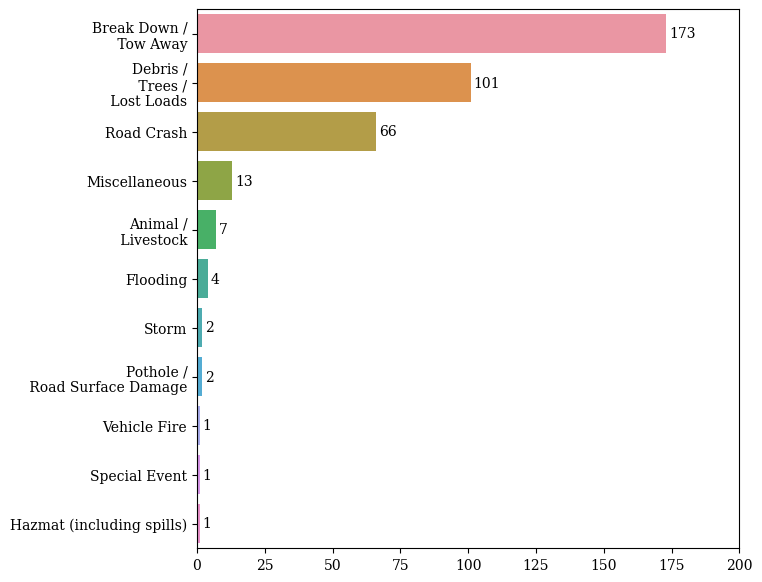

In [95]:
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.barplot(x=df1.Incident_Type.value_counts(),
           y=df1.Incident_Type.value_counts().index)
ax.set_xlabel('')
ax.set_xlim(right=200)
for p in ax.patches:
  width = p.get_width()
  ax.text(width + 1,
          p.get_y() + p.get_height()/2,
          int(width),
          ha="left",
          va="center")
plt.show()

In [96]:
# Since Special Event, Pothole / Road Surface Damage,
# and Hazmat (including spills) did not affect traffic congestion,
# these three categories are combined into
# Special Event / Pothole / Hazmat
df1.Incident_Type=df1.Incident_Type.replace(['Special Event',
                                            'Pothole /\n Road Surface Damage',
                                            'Hazmat (including spills)'],
                                           'Special Event /\nPothole / Hazmat')

In [98]:
df1.Incident_Type=df1.Incident_Type.replace(['Flooding', 'Storm'],
                                           'Flooding /\nStorm')

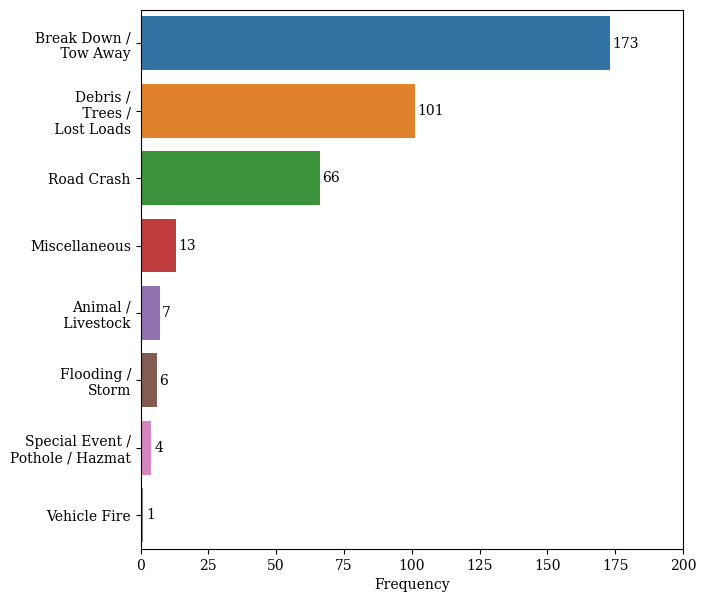

In [128]:
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.barplot(x=df1.Incident_Type.value_counts(),
           y=df1.Incident_Type.value_counts().index)
ax.set_xlabel('Frequency')
ax.set_xlim(right=200)
for p in ax.patches:
  width = p.get_width()
  ax.text(width + 1,
          p.get_y() + p.get_height()/2,
          int(width),
          ha="left",
          va="center")
plt.show()

In [123]:
custom_dict = {'Break Down /\n Tow Away': 7,
               'Debris /\n Trees /\n Lost Loads': 6,
               'Road Crash': 5,
               'Miscellaneous': 4,
               'Animal /\n Livestock': 3,
               'Flooding /\nStorm': 2,
               'Special Event /\nPothole / Hazmat': 1,
               'Vehicle Fire': 0}

df = (df1.groupby(['Incident_Type', 'Congestion'])
 .size().unstack().sort_values(by='Incident_Type',
                               key=lambda x: x.map(custom_dict))); df

Congestion,Congestion,Heavy Congestion,No Known Congestion
Incident_Type,,,
Vehicle Fire,NaN,1.0,NaN
Special Event /\nPothole / Hazmat,NaN,NaN,4.0
Flooding /\nStorm,2.0,NaN,4.0
Animal /\n Livestock,2.0,1.0,4.0
Miscellaneous,2.0,1.0,10.0
Road Crash,28.0,23.0,15.0
Debris /\n Trees /\n Lost Loads,20.0,5.0,76.0
Break Down /\n Tow Away,67.0,21.0,85.0


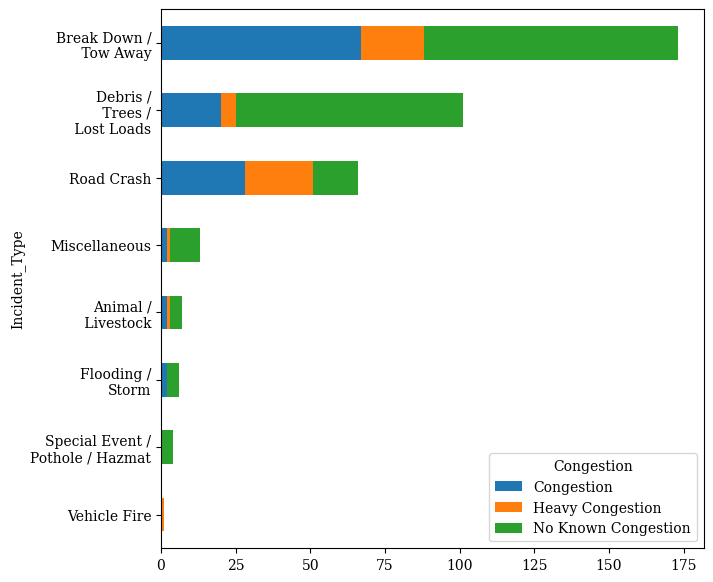

In [166]:
plt.rcParams["figure.figsize"] = (7,7)
(df1.groupby(['Incident_Type', 'Congestion'])
 .size().unstack().sort_values(by='Incident_Type',
                               key=lambda x: x.map(custom_dict))
 .plot(kind='barh', stacked=True))

plt.ylabel('')
plt.xlabel('Frequency')
plt.show()

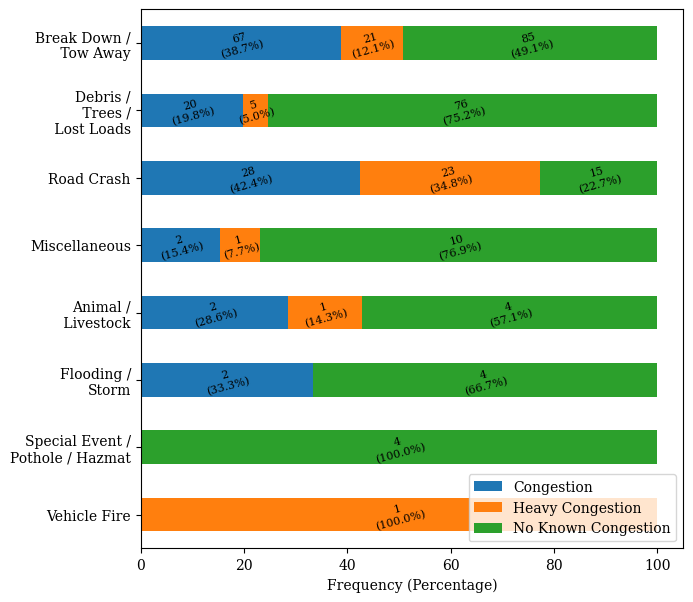

In [184]:
df_total = df.sum(axis=1)
df_rel = df.div(df_total, 0) * 100

plt.rcParams["figure.figsize"] = (7,7)
df_rel.plot(kind='barh', stacked=True)
plt.ylabel('')
plt.xlabel('Frequency (Percentage)')
plt.legend(loc='lower right')

for n in df_rel: # for each column
    for i, (cs, ab, pc) in enumerate(zip(df_rel.cumsum(1)[n], 
                                         df_rel[n], df[n])):
        if ~np.isnan(cs):
            plt.text(cs - ab / 2, i,
                 str(int(pc)) + '\n(' + str(np.round(ab, 1)) + '%)', 
                 va = 'center', ha = 'center', rotation = 15, fontsize = 8)

plt.show()

In [198]:
df1.TrafficCondition=df1.TrafficCondition.replace(['Left Emergency Lane Blocked',
                                             'Right Emergency Lane Blocked'],
                                             'Emergency Lane Blocked')

df1.TrafficCondition=df1.TrafficCondition.replace(['Left Lane(s) Blocked',
                                             'Right Lane(s) Blocked',
                                             'Centre Lane(s) Blocked',
                                             'Left Centre Lane(s) Blocked',
                                             'Right Centre Lane(s) Blocked',
                                             'Bus Lane Blocked'],
                                             'Lane(s) Blocked')

df1.TrafficCondition=df1.TrafficCondition.replace(['Left Turning Pocket Blocked',
                                             'Right Turning Pocket Blocked'],
                                             'Turning Pocket Blocked')

In [199]:
df1.TrafficCondition.value_counts()

Emergency Lane Blocked    145
Lane(s) Blocked           120
All Lanes Open             83
Lane Closures Unknown      19
Turning Pocket Blocked      4
Name: TrafficCondition, dtype: int64

In [200]:
df1.groupby(['TrafficCondition', 'Congestion']).size().unstack()

Congestion,Congestion,Heavy Congestion,No Known Congestion
TrafficCondition,,,
All Lanes Open,13,4,66
Emergency Lane Blocked,46,15,84
Lane Closures Unknown,6,2,11
Lane(s) Blocked,55,30,35
Turning Pocket Blocked,1,1,2


In [201]:
df1.groupby(['TrafficCondition', 'Incident_Type']).size().unstack()

Incident_Type,Animal /\n Livestock,Break Down /\n Tow Away,Debris /\n Trees /\n Lost Loads,Flooding /\nStorm,Miscellaneous,Road Crash,Special Event /\nPothole / Hazmat,Vehicle Fire
TrafficCondition,,,,,,,,
All Lanes Open,6.0,6.0,50.0,4.0,10.0,3.0,4.0,NaN
Emergency Lane Blocked,1.0,115.0,8.0,NaN,2.0,19.0,NaN,NaN
Lane Closures Unknown,NaN,1.0,16.0,1.0,NaN,1.0,NaN,NaN
Lane(s) Blocked,NaN,49.0,26.0,1.0,1.0,42.0,NaN,1.0
Turning Pocket Blocked,NaN,2.0,1.0,NaN,NaN,1.0,NaN,NaN


In [204]:
df1

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,TrafficCondition,Congestion,Duration
0,11402,-31.967082,115.846103,2018-01-01 16:21:00,2018-01-01 16:59:00,Break Down /\n Tow Away,Lane(s) Blocked,Congestion,38.0
1,11443,-32.033494,115.858312,2018-01-03 15:41:00,2018-01-03 15:56:00,Break Down /\n Tow Away,Emergency Lane Blocked,No Known Congestion,15.0
2,11475,-32.025228,115.859856,2018-01-04 17:10:00,2018-01-04 19:20:00,Break Down /\n Tow Away,Emergency Lane Blocked,No Known Congestion,130.0
3,11487,-32.043923,115.854653,2018-01-05 05:19:00,2018-01-05 05:58:00,Road Crash,Lane(s) Blocked,Congestion,39.0
4,11554,-32.011120,115.856484,2018-01-09 09:10:00,2018-01-09 09:40:00,Debris /\n Trees /\n Lost Loads,Lane(s) Blocked,No Known Congestion,30.0
...,...,...,...,...,...,...,...,...,...
367,18622,-31.997337,115.854986,2018-10-21 16:57:00,2018-10-21 17:25:00,Road Crash,Lane(s) Blocked,Congestion,28.0
368,18635,-31.984470,115.851317,2018-10-22 08:25:00,2018-10-22 09:42:00,Debris /\n Trees /\n Lost Loads,All Lanes Open,No Known Congestion,77.0
369,18637,-32.082478,115.848946,2018-10-22 08:33:00,2018-10-22 10:45:00,Debris /\n Trees /\n Lost Loads,Lane Closures Unknown,Congestion,132.0
370,18671,-31.963448,115.846710,2018-10-23 15:50:00,2018-10-23 16:02:00,Road Crash,Lane(s) Blocked,Heavy Congestion,12.0


## Merge Traffic data with new incident file

In [247]:
df2 = pd.read_csv('data/Kwinana_Fwy_Historic_Incidents_2018_Long.csv')
df2.head()

,OBJECTID,DateTime,Lat,Long,Incident_Type,TrafficCondition,Congestion,Duration
0,11402,2018-01-01 16:21:00,-31.967082,115.846103,Break Down / Tow Away,Right Lane(s) Blocked,Congestion,38.0
1,11402,2018-01-01 16:22:00,-31.967082,115.846103,Break Down / Tow Away,Right Lane(s) Blocked,Congestion,38.0
2,11402,2018-01-01 16:23:00,-31.967082,115.846103,Break Down / Tow Away,Right Lane(s) Blocked,Congestion,38.0
3,11402,2018-01-01 16:24:00,-31.967082,115.846103,Break Down / Tow Away,Right Lane(s) Blocked,Congestion,38.0
4,11402,2018-01-01 16:25:00,-31.967082,115.846103,Break Down / Tow Away,Right Lane(s) Blocked,Congestion,38.0


In [248]:
# Remove Lat, Long, Congestion, and Duration
df2 = df2[['DateTime', 'Lat', 'Incident_Type', 'TrafficCondition', 'Congestion']]
df2.head()

,DateTime,Lat,Incident_Type,TrafficCondition,Congestion
0,2018-01-01 16:21:00,-31.967082,Break Down / Tow Away,Right Lane(s) Blocked,Congestion
1,2018-01-01 16:22:00,-31.967082,Break Down / Tow Away,Right Lane(s) Blocked,Congestion
2,2018-01-01 16:23:00,-31.967082,Break Down / Tow Away,Right Lane(s) Blocked,Congestion
3,2018-01-01 16:24:00,-31.967082,Break Down / Tow Away,Right Lane(s) Blocked,Congestion
4,2018-01-01 16:25:00,-31.967082,Break Down / Tow Away,Right Lane(s) Blocked,Congestion


In [249]:
df2 = df2[df2.Incident_Type != 'Duplicate Entry']
df2.reset_index(drop=True)

df2.DateTime = pd.to_datetime(df2.DateTime)

df2.Incident_Type = df2.Incident_Type.str.replace('/', '/\n')

df2.Incident_Type=df2.Incident_Type.replace(['Special Event',
                                            'Pothole /\n Road Surface Damage',
                                            'Hazmat (including spills)'],
                                           'Special Event /\nPothole / Hazmat')

df2.Incident_Type=df2.Incident_Type.replace(['Flooding', 'Storm'],
                                           'Flooding /\nStorm')

df2.TrafficCondition=df2.TrafficCondition.replace(['Left Emergency Lane Blocked',
                                             'Right Emergency Lane Blocked'],
                                             'Emergency Lane Blocked')

df2.TrafficCondition=df2.TrafficCondition.replace(['Left Lane(s) Blocked',
                                             'Right Lane(s) Blocked',
                                             'Centre Lane(s) Blocked',
                                             'Left Centre Lane(s) Blocked',
                                             'Right Centre Lane(s) Blocked',
                                             'Bus Lane Blocked'],
                                             'Lane(s) Blocked')

df2.TrafficCondition=df2.TrafficCondition.replace(['Left Turning Pocket Blocked',
                                             'Right Turning Pocket Blocked'],
                                             'Turning Pocket Blocked')

In [250]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23773 entries, 0 to 23785
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DateTime          23773 non-null  datetime64[ns]
 1   Lat               23773 non-null  float64       
 2   Incident_Type     23773 non-null  object        
 3   TrafficCondition  23773 non-null  object        
 4   Congestion        23773 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.1+ MB


In [210]:
df3 = pd.read_csv('data/LAD.csv')

In [211]:
df3 = df3[['ID', 'DateTime', 'Length', 'Volume', 'Speed', 'Occupancy']]
df3.head()

,ID,DateTime,Length,Volume,Speed,Occupancy
0,1,2018-01-01 00:00:00,960.0,7.0,96.000000,1.0
1,1,2018-01-01 00:01:00,960.0,6.0,94.999998,1.0
2,1,2018-01-01 00:02:00,960.0,5.0,90.999999,1.0
3,1,2018-01-01 00:03:00,960.0,5.0,94.999997,1.0
4,1,2018-01-01 00:04:00,960.0,5.0,92.999999,1.0


In [195]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007680 entries, 0 to 6007679
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   DateTime   object 
 1   Length     float64
 2   Volume     float64
 3   Speed      float64
 4   Occupancy  float64
dtypes: float64(4), object(1)
memory usage: 229.2+ MB


In [213]:
loc_df=loc_df.reset_index(drop=True); loc_df

,Short Name,Latitude,Longitude
0,0002KWN-MU,-31.969905,115.846725
1,0003KWN-MU,-31.988385,115.853238
2,0080KWN-MU,-31.966753,115.846104
3,0081KWN-MUL,-31.971349,115.847240
4,0081KWN-MUT,-31.971322,115.847235
5,0082KWN-MUL,-31.975453,115.847930
6,0082KWN-MUT,-31.975427,115.847925
7,0083KWN-MUL,-31.985870,115.852111
8,0083KWN-MUT,-31.985845,115.852099
9,0084KWN-MUL,-32.008217,115.855277


In [264]:
def func(a):
    if "0220" in a or "0210" in a:
        return "1"
    elif "0091" in a or "0200" in a:
        return "2"
    elif "0090" in a:
        return "3"
    elif "0190" in a or "0089" in a:
        return "4"
    elif "0180" in a or "0700" in a:
        return "5"
    elif "0170" in a or "0702" in a:
        return "6"
    elif "0160" in a:
        return "7"
    elif "0088" in a or "0150" in a:
        return "8"
    elif "0087" in a or "0140" in a or "0086" in a:
        return "9"
    elif "0130" in a:
        return "10"
    elif "0085" in a or "0084" in a:
        return "11"
    elif "0120" in a or "0003" in a or "0083" in a or "0100" in a or "0082" in a or "0081" in a:
        return "12"
    elif "0002" in a:
        return "13"
    elif "0080" in a:
        return "14"
    else:
        return "Other"
    
loc_df['ID'] = loc_df['Short Name'].apply(lambda x: func(x))
loc_df

,Short Name,Latitude,Longitude,ID
0,0002KWN-MU,-31.969905,115.846725,13
1,0003KWN-MU,-31.988385,115.853238,12
2,0080KWN-MU,-31.966753,115.846104,14
3,0081KWN-MUL,-31.971349,115.847240,12
4,0081KWN-MUT,-31.971322,115.847235,12
5,0082KWN-MUL,-31.975453,115.847930,12
6,0082KWN-MUT,-31.975427,115.847925,12
7,0083KWN-MUL,-31.985870,115.852111,12
8,0083KWN-MUT,-31.985845,115.852099,12
9,0084KWN-MUL,-32.008217,115.855277,11


In [265]:
# Get the minimum and maximum latitude of each ID
minloc=loc_df.groupby('ID').Latitude.describe()[['min','max']].reset_index()
minloc.ID = minloc.ID.astype(int)
minloc=minloc.sort_values(by='ID')

In [266]:
minloc

,ID,min,max
0,1,-32.091154,-32.082917
6,2,-32.080696,-32.075871
7,3,-32.074042,-32.073970
8,4,-32.071075,-32.062365
9,5,-32.057092,-32.053689
10,6,-32.052286,-32.047264
11,7,-32.043637,-32.043565
12,8,-32.040758,-32.039625
13,9,-32.030254,-32.018318
1,10,-32.012242,-32.012242


In [268]:
def func2(a):
    if -32.091154 <= a < -32.080696:
        return "1"
    elif -32.080696 <= a < -32.074042:
        return "2"
    elif -32.074042 <= a < -32.071075:
        return "3"
    elif -32.071075 <= a < -32.057092:
        return "4"
    elif -32.057092 <= a < -32.052286:
        return "5"
    elif -32.052286 <= a < -32.043637:
        return "6"
    elif -32.043637 <= a < -32.040758:
        return "7"
    elif -32.040758 <= a < -32.030254:
        return "8"
    elif -32.030254 <= a < -32.012242:
        return "9"
    elif -32.012242 <= a < -32.010690:
        return "10"
    elif -32.010690 <= a < -32.003147:
        return "11"
    elif -32.003147 <= a < -31.969905:
        return "12"
    elif -31.969905 <= a < -31.966753:
        return "13"
    elif a >= -31.966753 :
        return "14"
    else:
        return "Other"

df2['ID'] = df2['Lat'].apply(lambda x: func2(x))
df2.head()

,DateTime,Lat,Incident_Type,TrafficCondition,Congestion,ID
0,2018-01-01 16:21:00,-31.967082,Break Down /\n Tow Away,Lane(s) Blocked,Congestion,13
1,2018-01-01 16:22:00,-31.967082,Break Down /\n Tow Away,Lane(s) Blocked,Congestion,13
2,2018-01-01 16:23:00,-31.967082,Break Down /\n Tow Away,Lane(s) Blocked,Congestion,13
3,2018-01-01 16:24:00,-31.967082,Break Down /\n Tow Away,Lane(s) Blocked,Congestion,13
4,2018-01-01 16:25:00,-31.967082,Break Down /\n Tow Away,Lane(s) Blocked,Congestion,13


In [269]:
# Total number of minutes incidents last for each link
df2.ID.value_counts()

12    7593
14    4607
9     2761
11    2418
1     1313
8     1191
5      918
4      811
6      753
13     675
2      487
3      143
10      55
7       48
Name: Lat, dtype: int64

In [252]:
df2.head()

,DateTime,Lat,Incident_Type,TrafficCondition,Congestion
0,2018-01-01 16:21:00,-31.967082,Break Down /\n Tow Away,Lane(s) Blocked,Congestion
1,2018-01-01 16:22:00,-31.967082,Break Down /\n Tow Away,Lane(s) Blocked,Congestion
2,2018-01-01 16:23:00,-31.967082,Break Down /\n Tow Away,Lane(s) Blocked,Congestion
3,2018-01-01 16:24:00,-31.967082,Break Down /\n Tow Away,Lane(s) Blocked,Congestion
4,2018-01-01 16:25:00,-31.967082,Break Down /\n Tow Away,Lane(s) Blocked,Congestion


In [253]:
df2.shape

(23773, 5)